In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [219]:
# Import dataframe
super_hero = pd.read_csv("superheroes_data.csv")

In [220]:
# Gotta see what we're working with
print(super_hero)

      id             name  intelligence  strength  speed  durability  power  \
0      1           A-Bomb          38.0     100.0   17.0        80.0   24.0   
1      2       Abe Sapien          88.0      28.0   35.0        65.0  100.0   
2      3         Abin Sur          50.0      90.0   53.0        64.0   99.0   
3      4      Abomination          63.0      80.0   53.0        90.0   62.0   
4      5          Abraxas          88.0      63.0   83.0       100.0  100.0   
..   ...              ...           ...       ...    ...         ...    ...   
726  727  Yellowjacket II          50.0      10.0   35.0        28.0   31.0   
727  728             Ymir          50.0     100.0   27.0       100.0   98.0   
728  729             Yoda          88.0      52.0   33.0        25.0  100.0   
729  730          Zatanna          81.0      10.0   23.0        28.0  100.0   
730  731             Zoom          50.0      10.0  100.0        28.0  100.0   

     combat               full-name            alte

## Making Data Workable

In [221]:
# Gotta see what kind of data is in each column
super_hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 731 non-null    int64  
 1   name               731 non-null    object 
 2   intelligence       566 non-null    float64
 3   strength           629 non-null    float64
 4   speed              566 non-null    float64
 5   durability         566 non-null    float64
 6   power              566 non-null    float64
 7   combat             566 non-null    float64
 8   full-name          630 non-null    object 
 9   alter-egos         731 non-null    object 
 10  aliases            731 non-null    object 
 11  place-of-birth     731 non-null    object 
 12  first-appearance   731 non-null    object 
 13  publisher          716 non-null    object 
 14  alignment          731 non-null    object 
 15  gender             731 non-null    object 
 16  race               429 non

In [225]:
# looking at number of unique values in certain columns with 'object' data to see whether or not 
#I can reasonably assign each unique input a number to make it categorical and numeric

for i in range(len(super_hero)):
    groups = list(set(super_hero["group-affiliation"]))

for i in range(len(super_hero)):
    alignment = list(set(super_hero["alignment"]))

for i in range(len(super_hero)):
    eye_colors = list(set(super_hero["eye-color"]))

for i in range(len(super_hero)):
    hair_colors = list(set(super_hero["hair-color"]))

print("Number of Unique Groups:", len(groups))
print("Alignment Categories:", len(alignment))
print(alignment)
print()
print("Different Eye Colors:", len(eye_colors))
print("Different Hair Colors:", len(hair_colors))

Number of Unique Groups: 482
Alignment Categories: 4
['bad', '-', 'neutral', 'good']

Different Eye Colors: 25
Different Hair Colors: 30


In [179]:
# Definite no for "group-affiliation", 482 is waaaay to many
# probably not hair or eye color either, few too many as well
# Alignment can be changed to numbers, only 3 real categories and I need to drop null values

In [180]:
super_hero.drop("url", axis=1, inplace=True)
# not useful for what I want to do
super_hero.drop("race", axis=1, inplace=True)
# too many null values
super_hero.drop("relatives", axis=1, inplace=True)
# object and not useful for my purposes
super_hero.drop("group-affiliation", axis=1, inplace=True)
# object and just too many unique values for me to work with
super_hero.drop("hair-color", axis=1, inplace=True)
# a few too many unique values and not very relavant
super_hero.drop("eye-color", axis=1, inplace=True)
# same reasons as hair-color
super_hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                731 non-null    int64  
 1   name              731 non-null    object 
 2   intelligence      566 non-null    float64
 3   strength          629 non-null    float64
 4   speed             566 non-null    float64
 5   durability        566 non-null    float64
 6   power             566 non-null    float64
 7   combat            566 non-null    float64
 8   full-name         630 non-null    object 
 9   alter-egos        731 non-null    object 
 10  aliases           731 non-null    object 
 11  place-of-birth    731 non-null    object 
 12  first-appearance  731 non-null    object 
 13  publisher         716 non-null    object 
 14  alignment         731 non-null    object 
 15  gender            731 non-null    object 
 16  height            731 non-null    object 
 1

In [181]:
super_hero = super_hero.dropna()
# I think it should have kept 566 rows, but for some reason it only kept 500?
super_hero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 730
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   name              500 non-null    object 
 2   intelligence      500 non-null    float64
 3   strength          500 non-null    float64
 4   speed             500 non-null    float64
 5   durability        500 non-null    float64
 6   power             500 non-null    float64
 7   combat            500 non-null    float64
 8   full-name         500 non-null    object 
 9   alter-egos        500 non-null    object 
 10  aliases           500 non-null    object 
 11  place-of-birth    500 non-null    object 
 12  first-appearance  500 non-null    object 
 13  publisher         500 non-null    object 
 14  alignment         500 non-null    object 
 15  gender            500 non-null    object 
 16  height            500 non-null    object 
 17  we

In [182]:
# Seeing if dropping na values gets rid of the '-' in alignment
for i in range(len(super_hero)):
    alignment = list(set(super_hero["alignment"]))

print("Alignment Categories:", len(alignment))
print(alignment)

Alignment Categories: 4
['bad', '-', 'neutral', 'good']


In [183]:
# It does not. 
# Gonna have to fix that somehow

In [184]:
# pull out rows where alignment is not 'bad', 'neutral', or 'good'

alignment_problems = super_hero[super_hero["alignment"]!="good"]
alignment_problems = alignment_problems[super_hero["alignment"]!="neutral"]
alignment_problems = alignment_problems[super_hero["alignment"]!="bad"]
print("Number of Probelms People:", len(alignment_problems))
alignment_problems

Number of Probelms People: 4


C:\Users\wendy\AppData\Local\Temp\ipykernel_12040\1518816837.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alignment_problems = alignment_problems[super_hero["alignment"]!="neutral"]
C:\Users\wendy\AppData\Local\Temp\ipykernel_12040\1518816837.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alignment_problems = alignment_problems[super_hero["alignment"]!="bad"]


,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,aliases,place-of-birth,first-appearance,publisher,alignment,gender,height,weight,occupation,base
33,34,Anti-Venom,75.0,60.0,65.0,90.0,96.0,84.0,Eddie Brock,"Toxin, Venom","['Eddie', 'Edwin Brock', 'Venom', 'Lethal Prot...","San Francisco, California",Amazing Spider-Man #569 (as Anti-Venom),Toxin,-,Male,"[""7'6"", '229 cm']","['795 lb', '358 kg']",Vigilante; former journalist for the Daily Globe,"New York, New York"
110,111,Blackwulf,50.0,28.0,8.0,30.0,69.0,25.0,Lucian,No alter egos found.,"['Pelops', 'Black Wolf']",Armechadon,"Thunderstrike #6 (March, 1994)",Marvel Comics,-,Male,"[""6'2"", '188 cm']","['195 lb', '88 kg']",Freedom Fighter,-
532,533,Q,100.0,12.0,17.0,100.0,100.0,40.0,Q,No alter egos found.,['Q Continuum'],-,-,Star Trek,-,Male,"['-', '0 cm']","['- lb', '0 kg']",-,-
689,690,Venompool,69.0,57.0,63.0,100.0,100.0,100.0,Wade Wilson,"Deadpool, Evil Deadpool",['Deadpool'],-,What If? Iron Man: Demon in an Armor #1 (Febru...,Deadpool,-,Male,"[""7'5"", '226 cm']","['- lb', '0 kg']",Conqueror; Adventurer,-


In [185]:
# Only 4, not too hard to fix
# A quick google search can tell me what their alignment should be and I can go in and change it

In [186]:
super_hero.loc[33, "alignment"] = "neutral"
super_hero.loc[110, "alignment"] = "good"
super_hero.loc[532, "alignment"] = "neutral"
super_hero.loc[689, "alignment"] = "neutral"

In [187]:
print(super_hero.loc[33])
# problems solved

id                                                                 34
name                                                       Anti-Venom
intelligence                                                     75.0
strength                                                         60.0
speed                                                            65.0
durability                                                       90.0
power                                                            96.0
combat                                                           84.0
full-name                                                 Eddie Brock
alter-egos                                               Toxin, Venom
aliases             ['Eddie', 'Edwin Brock', 'Venom', 'Lethal Prot...
place-of-birth                              San Francisco, California
first-appearance              Amazing Spider-Man #569 (as Anti-Venom)
publisher                                                       Toxin
alignment           

In [188]:
# make alignment categorical
# good = 1
# bad = -1
# neutral = 0
def mapper (x):
    if x == "good":
        return 1
    if (x == "bad"):
        return -1
    else:
        return 0

super_hero["alignment"] = super_hero["alignment"].map(lambda x:mapper(x))
super_hero["alignment"].nunique()

3

In [189]:
super_hero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 730
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   name              500 non-null    object 
 2   intelligence      500 non-null    float64
 3   strength          500 non-null    float64
 4   speed             500 non-null    float64
 5   durability        500 non-null    float64
 6   power             500 non-null    float64
 7   combat            500 non-null    float64
 8   full-name         500 non-null    object 
 9   alter-egos        500 non-null    object 
 10  aliases           500 non-null    object 
 11  place-of-birth    500 non-null    object 
 12  first-appearance  500 non-null    object 
 13  publisher         500 non-null    object 
 14  alignment         500 non-null    int64  
 15  gender            500 non-null    object 
 16  height            500 non-null    object 
 17  we

## Stats

In [190]:
super_hero.describe()

,id,intelligence,strength,speed,durability,power,combat,alignment
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,380.458000,64.808000,40.980000,39.850000,58.49600,63.840000,61.262000,0.396000
std,209.727718,19.775776,32.535653,24.136708,29.84828,29.752459,22.786659,0.892624
min,1.000000,6.000000,4.000000,1.000000,1.00000,0.000000,5.000000,-1.000000
25%,208.750000,50.000000,10.000000,23.000000,28.00000,37.000000,42.000000,-1.000000
50%,388.500000,63.000000,32.000000,33.000000,60.00000,63.000000,64.000000,1.000000
75%,565.250000,75.000000,72.000000,50.000000,85.00000,100.000000,80.000000,1.000000
max,731.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,1.000000


## Alignment Pie Chart

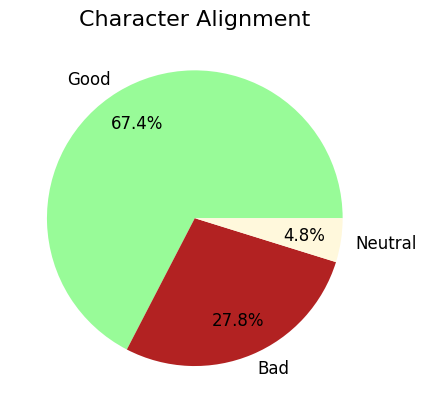

In [191]:
character_alignment = super_hero["alignment"].value_counts()
labels = ["Good", "Bad", "Neutral"]
pie_colors = ["palegreen", "firebrick", "cornsilk"]
plt.pie(character_alignment, labels=labels, colors=pie_colors, autopct='%.1f%%', pctdistance=0.75, textprops={'fontsize':12})
plt.title("Character Alignment", fontsize=16)
plt.show()

In [192]:
# We can see that the data is a little skewed with more entries for heros than villains or impartials

## Most Powerful Character

In [193]:
most_powerful = super_hero[super_hero["power"]==100]
print(len(most_powerful))
# I was hoping to find out who was the most powerful character, but it seems that 129 are tied for that position
# the best I can do is find the most physically powerful by finding the characters with the highest
# strength, speed, durability, and power
most_powerful.describe()

129


,id,intelligence,strength,speed,durability,power,combat,alignment
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.000000
mean,381.139535,73.899225,63.844961,55.434109,78.341085,100.0,64.542636,0.341085
std,206.023502,18.925778,32.884611,27.389792,25.774714,0.0,21.469094,0.897010
min,2.000000,6.000000,7.000000,8.000000,10.000000,100.0,6.000000,-1.000000
25%,230.000000,63.000000,33.000000,33.000000,64.000000,100.0,50.000000,-1.000000
50%,379.000000,75.000000,80.000000,50.000000,90.000000,100.0,64.000000,1.000000
75%,551.000000,88.000000,93.000000,79.000000,100.000000,100.0,80.000000,1.000000
max,731.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,1.000000


In [194]:
best = most_powerful[most_powerful["strength"]==100]
print(len(best))

26


In [195]:
best = best[best["speed"]==100]
print(len(best))

8


In [196]:
best = best[best['durability']==100]
print(len(best))
best.describe()

5


,id,intelligence,strength,speed,durability,power,combat,alignment
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.000000,5.000000
mean,613.200000,92.800000,100.0,100.0,100.0,100.0,78.000000,0.600000
std,51.533484,2.683282,0.0,0.0,0.0,0.0,6.708204,0.894427
min,524.000000,88.000000,100.0,100.0,100.0,100.0,70.000000,-1.000000
25%,613.000000,94.000000,100.0,100.0,100.0,100.0,75.000000,1.000000
50%,642.000000,94.000000,100.0,100.0,100.0,100.0,75.000000,1.000000
75%,643.000000,94.000000,100.0,100.0,100.0,100.0,85.000000,1.000000
max,644.000000,94.000000,100.0,100.0,100.0,100.0,85.000000,1.000000


In [197]:
# This is a list of the most physically powerful characters in the database, 4 of which are kryptonians
# 4 have an alignnment of "good" and only one is evil, superboy prime who actually basically destroyed the entire universe
best

,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,aliases,place-of-birth,first-appearance,publisher,alignment,gender,height,weight,occupation,base
523,524,Power Girl,94.0,100.0,100.0,100.0,100.0,75.0,Kara Zor-L,No alter egos found.,"['Karen Starr', 'Nightwing']",-,All-Star Comics #58 (January/February 1976),DC Comics,1,Female,"[""5'11"", '180 cm']","['180 lb', '81 kg']",-,-
612,613,Spectre,88.0,100.0,100.0,100.0,100.0,70.0,Aztar,Aztar,"['Spirit of Vengeance', 'Wrath of God', 'Spiri...",-,"More Fun Comics #52 (February, 1940)",Aztar,1,Male,"['-', '0 cm']","['- lb', '0 kg']",-,-
641,642,Superboy-Prime,94.0,100.0,100.0,100.0,100.0,85.0,Kal-El,No alter egos found.,['Superman-Prime; Prime; Superboy; Clark Kent;...,Krypton (Earth-Prime),"DC Comics Presents #87 (November, 1985)",DC Comics,-1,Male,"[""5'11"", '180 cm']","['170 lb', '77 kg']",-,"currently a recreation of Earth-Prime, formerl..."
642,643,Supergirl,94.0,100.0,100.0,100.0,100.0,75.0,Kara Zor-El,No alter egos found.,"['Linda Lang', 'Kara-El', 'Kara Kent', 'Flameb...","Argo City, Krypton","Superman/Batman #8 (May, 2004)",DC Comics,1,Female,"[""5'5"", '165 cm']","['120 lb', '54 kg']","Intern, Adventurer, Student, Crime-Fighter",Metropolis
643,644,Superman,94.0,100.0,100.0,100.0,100.0,85.0,Clark Kent,Superman Prime One-Million,"['Clark Joseph Kent', 'The Man of Steel', 'the...",Krypton,ACTION COMICS #1,Superman Prime One-Million,1,Male,"[""6'3"", '191 cm']","['225 lb', '101 kg']",Reporter for the Daily Planet and novelist,Metropolis


## Finding Smartest Characters

In [198]:
smart = super_hero[super_hero["intelligence"]==100]
smart = smart.sort_values(by="power", ascending=False)
print(len(smart))
smart

35


,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,aliases,place-of-birth,first-appearance,publisher,alignment,gender,height,weight,occupation,base
34,35,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0,En Sabah Nur,No alter egos found.,"['The Eternal One', 'the High Lord', 'Set', 'H...","Akkaba, Egypt","X-Factor #5 (June, 1986)",Marvel Comics,-1,Male,"[""7'0"", '213 cm']","['300 lb', '135 kg']",Student; formerly Conqueror; Scientist,"Celestial Ship, mobile"
345,346,Iron Man,100.0,85.0,58.0,85.0,100.0,64.0,Tony Stark,No alter egos found.,"['Iron Knight', 'Hogan Potts', 'Spare Parts Ma...","Long Island, New York","Tales of Suspence #39 (March, 1963)",Marvel Comics,1,Male,"[""6'6"", '198 cm']","['425 lb', '191 kg']","Inventor, Industrialist; former United States ...","Seattle, Washington"
221,222,Doctor Doom,100.0,32.0,20.0,100.0,100.0,84.0,Victor von Doom,No alter egos found.,"['The Master', 'Invincible Man']","Haasenstadt, Latveria",Fantastic Four #5 (July 1962),Marvel Comics,-1,Male,"[""6'7"", '201 cm']","['415 lb', '187 kg']",Monarch,"Castle Doom, Doomstadt, Latveria"
708,709,Watcher,100.0,80.0,67.0,89.0,100.0,56.0,Uatu,No alter egos found.,['-'],-,"Fantastic Four #13 (April, 1963)",Marvel Comics,1,Male,"['-', '0 cm']","['- lb', '0 kg']",-,-
654,655,Thanos,100.0,100.0,33.0,100.0,100.0,80.0,Thanos,No alter egos found.,"['The Mad Titan', 'Masterlord', 'The Overmaste...",Titan,Iron Man #55,Marvel Comics,-1,Male,"[""6'7"", '201 cm']","['985 lb', '443 kg']","Conqueror, worshiper of Death","Mobile, formerly Sanctuary II, Titan"
272,273,Galactus,100.0,100.0,83.0,100.0,100.0,50.0,Galan,No alter egos found.,"['Maker', 'Devourer of Worlds', 'Eater-of-Worl...",(Galan) Taa; (Galactus) the Cosmic Egg,Fantastic Four #48 (March 1966),Marvel Comics,0,Male,"[""28'9"", '876 cm']","['36400 lb', '16 tons']","Planet Devourer, Third Force of the Universe -...",Worldship (aka Taa II); though he is generally...
225,226,Doctor Strange,100.0,10.0,12.0,84.0,100.0,60.0,Stephen Strange,No alter egos found.,"['Sorcerer Supreme', 'Master of the Mystic Art...","Philadelphia, Pennsylvania","Strange Tales #110 (July, 1963)",Marvel Comics,1,Male,"[""6'2"", '188 cm']","['180 lb', '81 kg']","Sorcerer Supreme, retired neurosurgeon",-
429,430,Mandarin,100.0,28.0,23.0,28.0,100.0,95.0,Khan,No alter egos found.,"['Tem Borjigin', 'Gene Kahn', 'Master Khan', '...",China,"Tales of Suspense #50 (February, 1964)",Marvel Comics,-1,Male,"[""6'2"", '188 cm']","['215 lb', '97 kg']","Would-be conqueror; former janitor, businessma...",Prometheus Corporation; formerly Dragon of Hea...
431,432,Martian Manhunter,100.0,95.0,92.0,100.0,100.0,85.0,J'onn J'onzz,No alter egos found.,"[""ohn Jones; J'Onn J'Onzz (alternate spelling)...",-,Detective Comics #225 (1955),DC Comics,1,Male,"[""6'7"", '201 cm']","['300 lb', '135 kg']",-,-
458,459,Mister Mxyzptlk,100.0,85.0,100.0,100.0,100.0,50.0,Mr. Mxyzptlk,No alter egos found.,['-'],-,Superman #30,DC Comics,-1,Male,"['-', '0 cm']","['- lb', '0 kg']",-,-


In [199]:
# Intelligence ratings seem spot-on, but not sure I agree with some of these values for "power"
# No way is Vision or Iron Man as powerful as Galactus or Thanos or Phoenix. wild.
# Also, if you care to scroll down a little, I find it funny that the way I sorted this dataframe puts Batman right next to Joker
# I also wouldn't have rated the Scarlet Witch or Nova as 100 on intellignce, sure Nova has the Worldmind but I dont think that should count

## Finding the Characters most skilled at Combat ( aka Batman(s) )

In [200]:
combat_gurus = super_hero[super_hero["combat"]==100]
print(len(combat_gurus))
combat_gurus

30


,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,aliases,place-of-birth,first-appearance,publisher,alignment,gender,height,weight,occupation,base
65,66,Batgirl IV,69.0,12.0,27.0,56.0,46.0,100.0,Cassandra Cain,No alter egos found.,"['Kasumi', 'various mundane persona,']",League of Assassins (exact base is unknown),Batman: Legends of the Dark Knight #120,DC Comics,1,Female,"[""5'5"", '165 cm']","['115 lb', '52 kg']",-,Gotham City; Bl�dhaven; Tibet; New York City
69,70,Batman,100.0,26.0,27.0,50.0,47.0,100.0,Bruce Wayne,No alter egos found.,"['Insider', 'Matches Malone']","Crest Hill, Bristol Township; Gotham County",Detective Comics #27,DC Comics,1,Male,"[""6'2"", '188 cm']","['210 lb', '95 kg']",Businessman,"Batcave, Stately Wayne Manor, Gotham City; Hal..."
70,71,Batman II,88.0,11.0,33.0,28.0,36.0,100.0,Dick Grayson,"Nightwing, Robin",['Dick Grayson'],-,-,Nightwing,1,Male,"[""5'10"", '178 cm']","['175 lb', '79 kg']",-,"Gotham City; formerly Bludhaven, New York City"
80,81,Big Barda,88.0,100.0,79.0,100.0,100.0,100.0,Barda Free,No alter egos found.,"['Barda', 'the Strongest Woman in the World']",-,Mister Miracle (Volume 1) #4,DC Comics,-1,Female,"[""6'2"", '188 cm']","['300 lb', '135 kg']",-,"Gotham City, New Genesis, formerly Apokolips"
105,106,Black Panther,88.0,16.0,30.0,60.0,41.0,100.0,T'Challa,No alter egos found.,"['Mr. Okonkwo', 'The Man Without Fear', 'Luke ...","Wakanda, Africa",Fantastic Four Vol. 1 #52 (1966),Marvel Comics,1,Male,"[""6'0"", '183 cm']","['200 lb', '90 kg']","King and Chieftain of Wakanda, scientist; form...","Wakanda, Mobile"
106,107,Black Widow,75.0,13.0,33.0,30.0,36.0,100.0,Natasha Romanoff,No alter egos found.,"['Yelena Belova', 'Natasha Romanoff', 'Natasha...",-,Tales of Suspense #52,Marvel Comics,1,Female,"[""5'7"", '170 cm']","['131 lb', '59 kg']","Adventurer, Intelligence agent, former ballerina",Mobile
148,149,Captain America,69.0,19.0,38.0,55.0,60.0,100.0,Steve Rogers,No alter egos found.,"['Nomad', 'The Captain']","Manhattan, New York City, New York",Captain America Comics #1 (March 1941),Marvel Comics,1,Male,"[""6'2"", '188 cm']","['240 lb', '108 kg']","Adventurer, federal official, intelligence ope...",New York City
200,201,Daredevil,75.0,13.0,25.0,35.0,61.0,100.0,Matt Murdock,No alter egos found.,"['Matt', 'Jack Batlin', 'Kingpin of Crime', 'L...","New York City, New York","Daredevil #1 (April, 1964)",Marvel Comics,1,Male,"[""6'0"", '183 cm']","['200 lb', '90 kg']","Adventurer, vigilante, Attorney at Law","Hell's Kitchen, New York, New York, Shadowland..."
207,208,Darth Vader,69.0,48.0,33.0,35.0,100.0,100.0,Anakin Skywalker,No alter egos found.,['Lord Vader'],Tatooine,Star Wars: Episode IV - A New Hope (1977),George Lucas,-1,Male,"[""6'6"", '198 cm']","['300 lb', '135 kg']","Sith Lord, Supreme Commander of the Imperial F...",Death Star
212,213,Deadpool,69.0,32.0,50.0,100.0,100.0,100.0,Wade Wilson,"Evil Deadpool, Venompool","['Wade Wilson', 'Jack', 'Chiyonosake (""the Wol...",Canada,"New Mutants #98 (February, 1991)",Evil Deadpool,0,Male,"[""6'2"", '188 cm']","['210 lb', '95 kg']","Mercenary; former enforcer, government operati...","Cavern-X, Sedona, Arizona, Mobile"


In [201]:
# I agree more with the combat ratings than I did with power
# I didn't notice before, but Dick Grayson actually appears twice in this dataframe

## Find Significant Correlations Between Columns

In [202]:
print(len(super_hero.corr(numeric_only=True)))

8


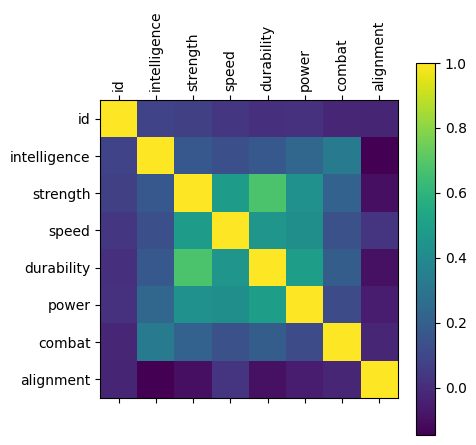

In [203]:
# Make a correlation matrix
super_hero_corr_matrix = super_hero.corr(numeric_only=True)
plt.matshow(super_hero_corr_matrix)
plt.colorbar()

labels = ["id", "intelligence", "strength", "speed", "durability", "power", "combat", "alignment"]

plt.xticks(range(8), labels, rotation=90) # range(8) because we have 8 numeric data columns
plt.yticks(range(8), labels)
plt.show()

In [204]:
# Stength and Durability are highly correlated as are all the other more physical attributes
# Interestingly, intelligence and Alignment are negatively correlated, the smarter a character is the more likley they are evil

In [205]:
# Naming Variables I'm gonna use in my graphs and such
intelligence = super_hero["intelligence"]
combat = super_hero["combat"]
alignment = super_hero["alignment"]
strength = super_hero["strength"]
durability = super_hero["durability"]

Correlation: 0.6762154230600045
Slope: 0.6203615196380038
Y-Intercept: 33.07358492523461


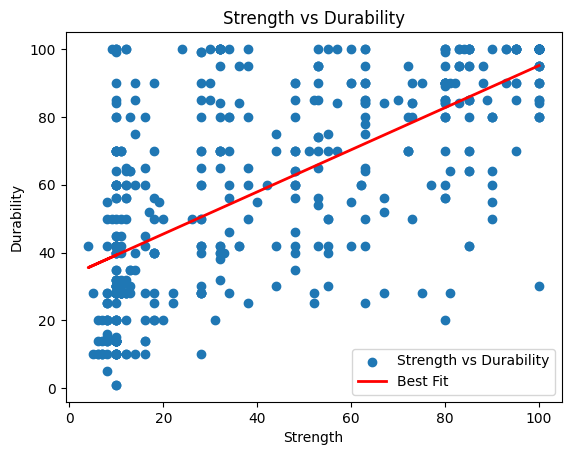

In [206]:
# Plot Strength vs Durability for funsies to see the correlation visably

# Creating Scatterplot
plt.scatter(strength, durability, label="Strength vs Durability")
plt.xlabel("Strength")
plt.ylabel("Durability")
plt.title("Strength vs Durability")

# Pearson's Correlation Coefficient
corr = scipy.stats.pearsonr(strength, durability)
print("Correlation:", corr[0])

import numpy as np
# Line of Best Fit
linear_model = scipy.stats.linregress(strength, durability)
slope = linear_model.slope
y_intercept = linear_model.intercept
linear_fit = slope*strength+y_intercept
plt.plot(strength, linear_fit, linewidth=2, color="red", label="Best Fit")

print("Slope:", slope)
print("Y-Intercept:", y_intercept)

# Legend
plt.legend(fontsize=10, loc="best")
plt.show()

Correlation: 0.3231776726759873
Slope: 0.3723818235662199
Y-Intercept: 37.12867877832042


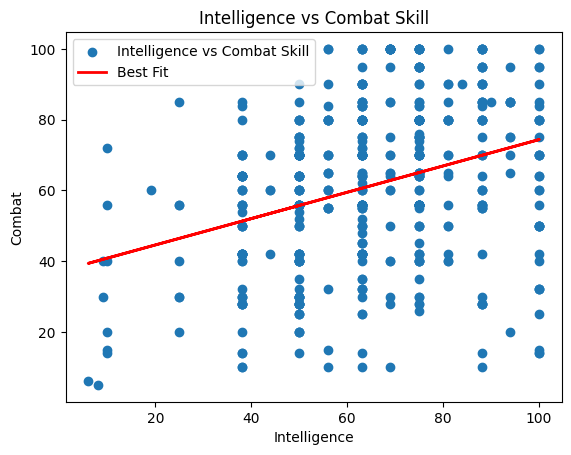

In [207]:
# Plot Intelligence vs Combat for funsies since there seemed to be some correlation of significance there

# Creating Scatterplot
plt.scatter(intelligence, combat, label="Intelligence vs Combat Skill")
plt.xlabel("Intelligence")
plt.ylabel("Combat")
plt.title("Intelligence vs Combat Skill")

# Pearson's Correlation Coefficient
corr = scipy.stats.pearsonr(intelligence, combat)
print("Correlation:", corr[0])

import numpy as np
# Line of Best Fit
linear_model = scipy.stats.linregress(intelligence, combat)
slope = linear_model.slope
y_intercept = linear_model.intercept
linear_fit = slope*intelligence+y_intercept
plt.plot(intelligence, linear_fit, linewidth=2, color="red", label="Best Fit")

print("Slope:", slope)
print("Y-Intercept:", y_intercept)

# Legend
plt.legend(fontsize=10, loc="best")
plt.show()

In [208]:
# gonna plot the evil genius correlation
# Since alignment is made up of 3 integers a bar or scatterplot won't show much

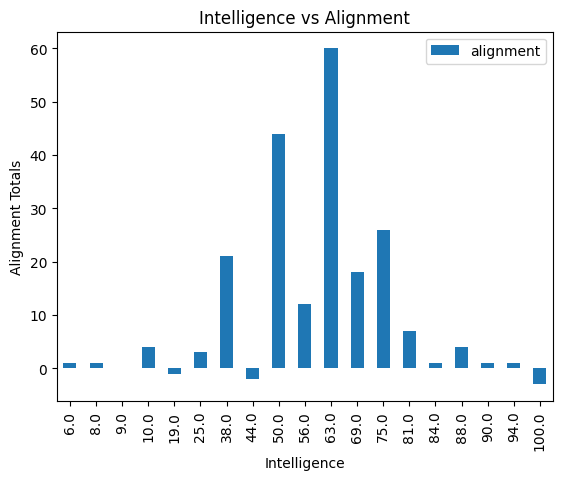

In [209]:
# Making pivot table
super_hero_pt = pd.pivot_table(super_hero, values="alignment", columns=None, index="intelligence", aggfunc="sum")

# Making pivot chart
super_hero_pt.plot(kind="bar", xlabel="Intelligence", ylabel="Alignment Totals", title="Intelligence vs Alignment")
plt.xticks(rotation=90)
plt.show()

In [210]:
# Test to make sure my pivot chart is doing what I want it to do.

mid_smarts = super_hero[super_hero["intelligence"]==63]
print(len(mid_smarts))
print()

mid_baddies = mid_smarts[mid_smarts["alignment"]==-1]
mid_heroes = mid_smarts[mid_smarts["alignment"]==1]
print(len(mid_baddies))
print(len(mid_heroes))
print()

print(len(mid_heroes)-len(mid_baddies))

93

16
76

60


## Machine Learning

Accuracy: 57.99999999999999


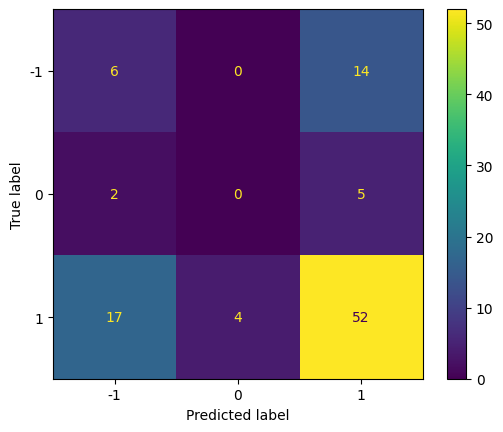

In [211]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

x = super_hero[["intelligence", "strength", "durability"]]
# "alignment" has strong indirect correlation with "intelligence", "strength", and "durability"
y = super_hero["alignment"]
# I chose "MedHouseVal" as my y variable because it seemed like the most useful thing to have to predict in the housing market

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy*100)

ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

Text(0.5, 1.0, 'Number of Neighbors vs Accuracy')

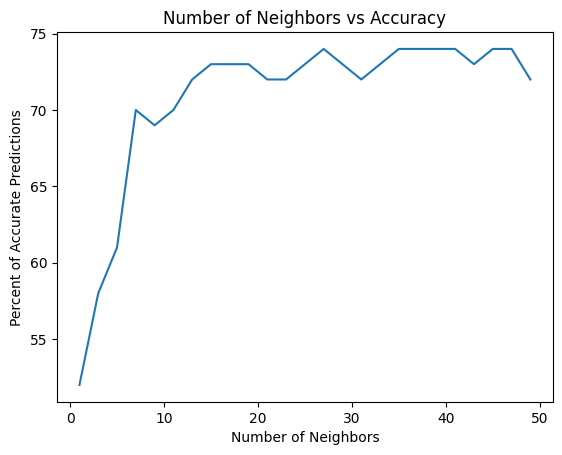

In [213]:
# Makes a graph to help us see what number of neighbors gives the best accuracy scores
k_values = []
accuracy_scores = []
for k in range(1, 50, 2):
   
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    
    accuracy = accuracy_score(y_test, predictions)
    #print("Number of Neighbors:", k)
    #print(accuracy*100)
    #print()
    k_values.append(k)
    accuracy_scores.append(accuracy*100)

plt.plot(k_values, accuracy_scores)
plt.xlabel("Number of Neighbors")
plt.ylabel("Percent of Accurate Predictions")
plt.title("Number of Neighbors vs Accuracy")

In [69]:
# 18 neighbors looks like a good value to use

Accuracy: 70.0


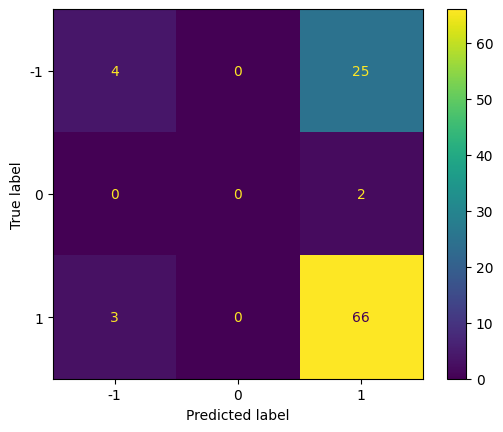

In [78]:
classifier = KNeighborsClassifier(n_neighbors=18)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy*100)

ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [79]:
# went up 15% accuracy from 55 - 70%

## Chi-Square Test

In [124]:
# Chi Square Test

# Making a crosstab
intelligence_vs_alignment = pd.crosstab(intelligence, alignment)

c, p, dof, expected = scipy.stats.chi2_contingency(intelligence_vs_alignment)
print("The P-Value is:", p)

The P-Value is: 0.0010586481925795586


In [126]:
# p-value is very close to zero so there is a significant correlation between intelligence and alignment, as we already knew from out correlation table